![Python logo](https://g.foolcdn.com/art/companylogos/square/shop.png)

## Dataset information

This dataset contains sneakers orders data on 100 shops's Shopify on over a 30 day window.Let's start by reading the data and visualizing what it looks like.



In [42]:
import pandas as pd
import numpy as np
import matplotlib as mp
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/14379/Downloads/New folder/shopify.csv")

In [4]:
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


## Objectives
We are going to answer 3 questions about calculating AOV(average order value)

## Data exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [6]:
df.isnull().sum()


order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

The result shows there is no NULL value in our dataset.



In [7]:
df.shape

(5000, 7)

In [8]:
df.columns

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')

In [15]:
df[["order_amount","total_items"]].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000



By looking at statistics values of dataset,we are provided with information about the quantity range of data spreading.As it shows the mean of ordere_amount(average) is 3145.128 $ that means customers spent this amount on average in each transaction.


## Visualization

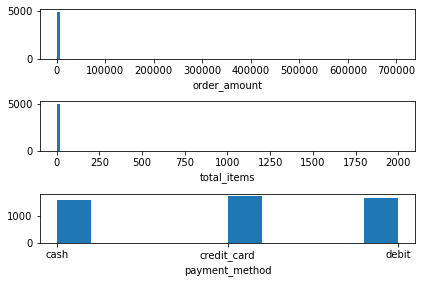

In [85]:
plt.subplot(3,1,1)
plt.hist(df.loc[:,"order_amount"],bins=100)
plt.xlabel('order_amount')

plt.subplot(3,1,2)
plt.hist(df.loc[:,"total_items"],bins=100)
plt.xlabel('total_items')


plt.subplot(3,1,3)
plt.hist(df.loc[:,"payment_method"])
plt.xlabel('payment_method')

plt.tight_layout()
plt.show()


Valuable information can be extracted from histogram plots.Spread of order_amount and total_order is very low. About payment_method that is a categorical variable, it is shown people tend to pay by credit_card more than other methods.


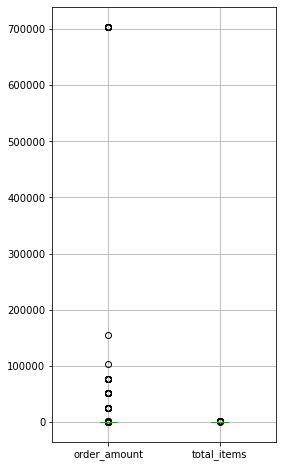

In [39]:
df.boxplot(column=['order_amount',"total_items"],figsize=(4,8))

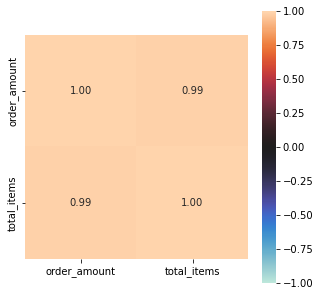

{'corr':               order_amount  total_items
 order_amount      1.000000     0.991747
 total_items       0.991747     1.000000,
 'ax': <matplotlib.axes._subplots.AxesSubplot at 0x2b0e7607c70>}

In [86]:
from dython.nominal import associations
associations(df[["order_amount","total_items"]],figsize=(5,5))

## Identifying the wrong method

 
### Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.



It seems the reported metric as AOV was calculated(non correctly) from this way :
           

a) total of order_amount= sum up all order_amount

b) number of order_amount= the length of dataframe or simply number of rows

c) AOV= a/b
 
 


In [90]:

total_order_amount=df["order_amount"].sum()
print(f"Total of order_amount: {total_order_amount} $")

Total of order_amount: 15725640 $


In [92]:
AOV= total_order_amount/len(df)
print(F"AOV : {AOV} $")

AOV : 3145.128 $


We see here the result number is average of order_amount as we divided the sum of order_amount by the number of order_amount.So this output can not  tell us about item price.  


## AOV
AOV is an important metric for data-driven business.It represents the amount that customers paid per  transaction. As an order can include more than one item like this case, AOV can not be a representative of the price(or average price) of one item.


In [94]:
df[["order_amount","total_items"]]

,order_amount,total_items
0,224,2
1,90,1
2,144,1
3,156,1
4,156,1
...,...,...
4995,330,2
4996,234,2
4997,351,3
4998,354,2



By looking at these two columns, we found that total_items for each order_amount is different .So some order_amount are related 
to more than one item.


### What metric would you report for this dataset?

If we want the average price of a product ,we have to divide total_order_amount by sum of total_items.



### What is its value?

In [28]:
total_items=df["total_items"].sum()
print(f"total number of items :{total_items}")

total number of items :43936


In [32]:
average_price_item=Total_amount/total_items
print(f"average price : {average_price_item} $")

average price : 357.92152221412965 $


This result shows the average price of a product in 100 shops of shopify(on a 1 month monitoring window) is around 358 $.

# SQL part


Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

How many orders were shipped by Speedy Express in total?


In [ ]:
SELECT COUNT(OrderID) AS Total_Orders_Speedy_Express 
FROM [Orders]
WHERE ShipperID=
                            (SELECT ShipperID FROM [Shippers]
                            WHERE ShipperName='Speedy Express')

      Total_Orders_Speedy_Express
       54



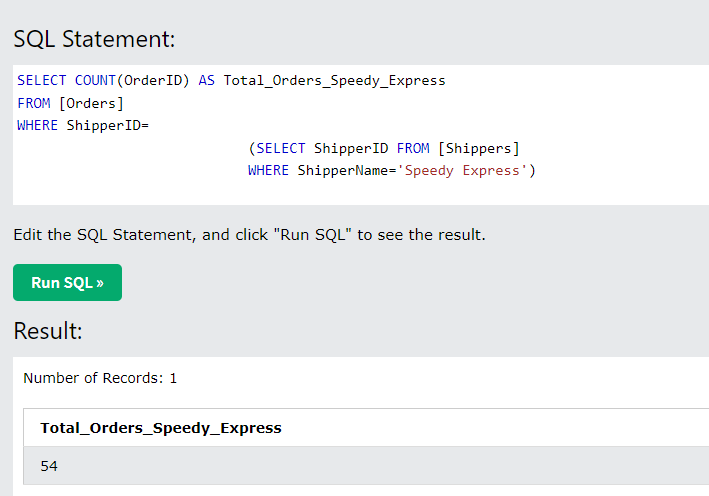

b) What is the last name of the employee with the most orders?


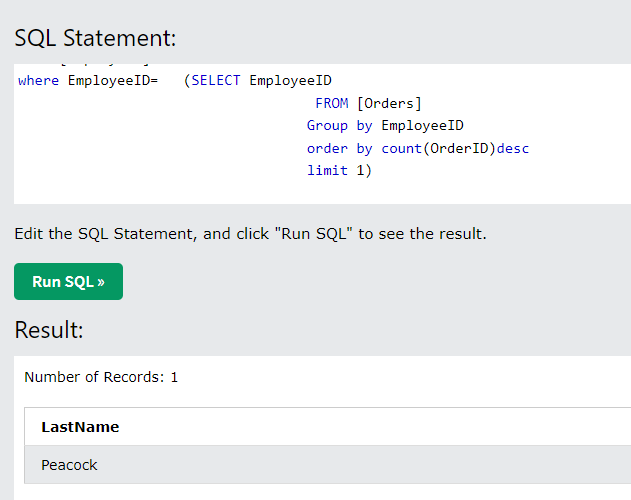

c) What product was ordered the most by customers in Germany?

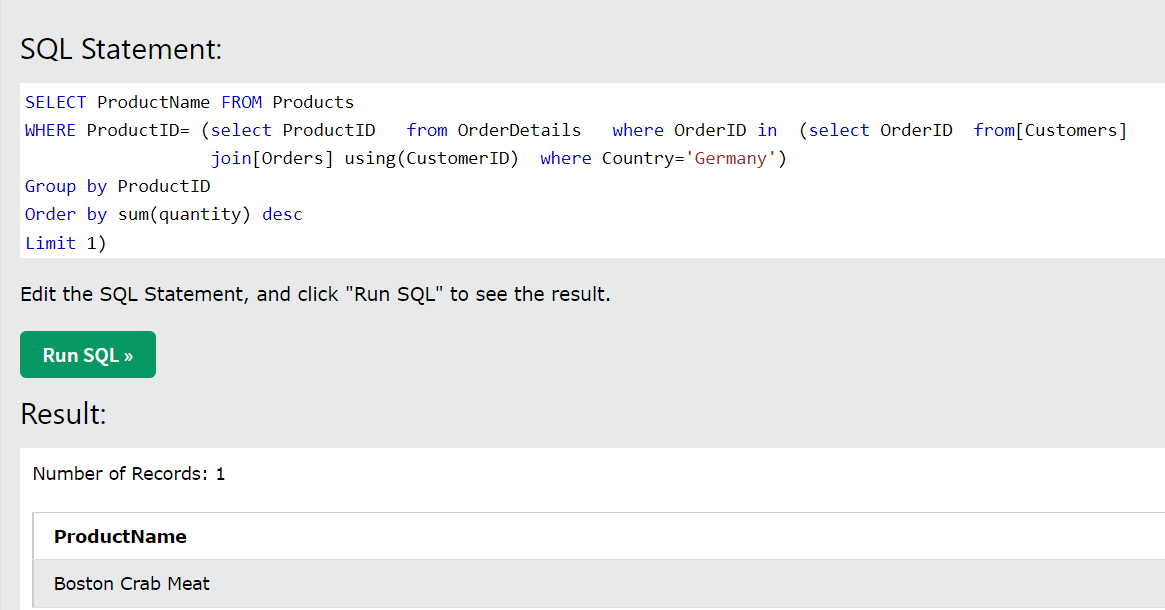